## 講習4 --- matplotlib でデータの可視化を行う

matplotlibはデータ可視化のためのパッケージです。    
http://matplotlib.org  
のページの gallery のページには膨大な数のサンプルがあり、どんなグラフを作成できるのかを見る事ができます。一度ご覧になるのをお勧めします。さらに、それぞれのサンプルコードも見る事ができます。
galleryページのサンプルは膨大なので、まずは、代表的なものだけを取り上げた次のページを見るのがいいかもしれません。  
http://matplotlib.org/users/screenshots.html 

ここでは、データ解析によく使いそうな、ヒストグラム、等級-エラープロット、FITSデータの表示の例を示します。

### inline表示  
inline表示にしてやると、notebook内にグラフを表示して、それを保存することができます。  
下のように宣言しておきます。

In [1]:
%matplotlib inline

matplotlibパッケージの中で最もよく使うモジュールはpyplotです。**matplotlib.pyplot as plt** の省略がよく使われます。

In [2]:
import matplotlib.pyplot as plt

### 測光データをグラフ化する 

./sample_data/mag.txt には等級(列1)、等級エラー(列2)のテーブルが記録されています。  numpyのところでやったように、**numpy.loadtxt()**を用いてこのデータを読み込みます。

In [3]:
import numpy as np

In [4]:
mlist = np.loadtxt('./sample_data/mag.txt')

ndarray形式で読み込まれます。array([[等級, 等級エラー], [等級, 等級エラー], .... ] )  
このあとグラフ作成時の分かりやすさのために、magとmerrを分けて別々の配列にしておきます。 [:, 0]は2番目のインデックスが0のものを全て取り出すという意味です。下のようにいくつか例を書き出してみると分かると思いますが、2番目のインデックスが0のものが等級で、2番目のインデックスが1のものが等級エラーです。

In [5]:
print (mlist[0,0], mlist[0,1])
print (mlist[1,0], mlist[1,1])
print (mlist[2,0], mlist[2,1])

15.025 0.004
16.236 0.011
17.97 0.053


In [6]:
mag = mlist[:, 0]
merr = mlist[:, 1]

In [7]:
mag[:10]  # 長いので最初の10コだけ抽出

array([ 15.025,  16.236,  17.97 ,  17.677,  19.086,  19.215,  17.822,
        17.517,  17.616,  18.98 ])

### 光度関数のヒストグラム 
まずは何も考えずに等級のヒストグラムを描いてみます。**plt.hist()**を使います。

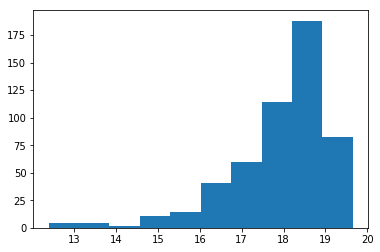

In [8]:
plt.hist(mag)
plt.show()

次に、少し手を加えてみます。  

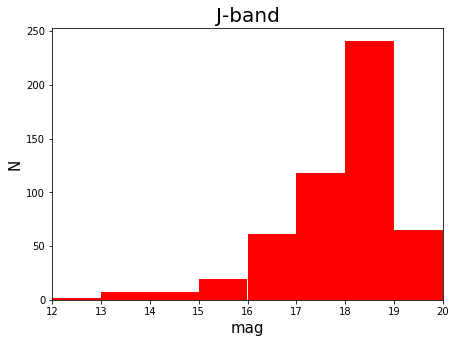

In [9]:
plt.figure(figsize=(7, 5))  #  図のサイズ 
plt.hist(mag, bins=8, range=(12,20), color='red')  # ビンの数、ヒストグラムの範囲、色を指定
plt.xlim(12, 20) # グラフのX軸の範囲
plt.title('J-band', fontsize=20)  
plt.xlabel('mag', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.show()

関数でどんな引数が使えるかを調べたい時には、下のように?をおしりにつけます。

In [10]:
plt.hist?

### 等級 vs. 等級エラープロット 
まずは何も考えずにプロット。**plt.scatter()**を使います。

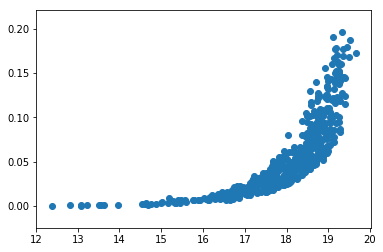

In [11]:
plt.scatter(mag, merr)
plt.show()

手を加えてみます。TeXで書くこともできます。   
ここのmarkdownでもこんなふうに書けます。$\sigma_{mag}$

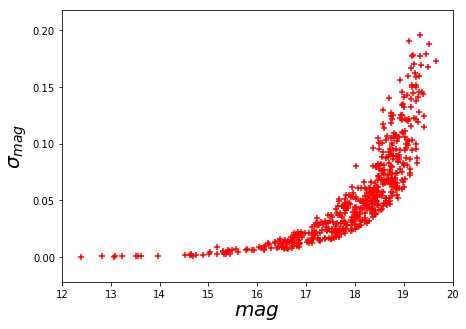

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(mag, merr, marker='+', color='red')
plt.xlim(12, 20)
plt.xlabel(r'$mag$', fontsize=20)
plt.ylabel(r'$\sigma_{mag}$', fontsize=20)
plt.show()

### FITS画像の表示

FITS画像をnotebook内に表示します。

In [13]:
from astropy.io import fits

In [16]:
img = fits.getdata('iM15n5c3.fits')   #   iM15n5c1.fits でもよいです

まずは何も考えずに、グレイスケールで表示してみます。

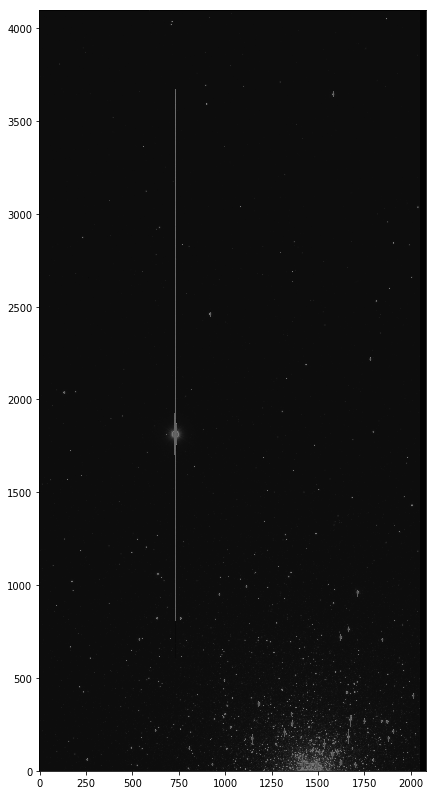

In [17]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, origin='lower', interpolation='none')
plt.show()

plt.cm.grayはカラーマップです。plt.cm.[カラーの名前]で指定します。  
http://matplotlib.org/examples/color/colormaps_reference.html   

上のままではよくわかりません。表示レベルをちゃんと設定してやります。  
3-sigma clipしてmedianとstandard deviationを求めます。

In [18]:
subimg = img[:, :2045]
np.median(subimg), np.std(subimg), np.min(subimg), np.max(subimg)

(4083.063, 2194.2827, -67.876076, 78562.531)

In [19]:
xx = np.where((subimg > 3000) & (subimg < 5000))
med = np.median(subimg[xx])
std = np.std(subimg[xx])

xx = np.where((subimg > med - 3 * std) & (subimg < med + 3 * std))
med = np.median(subimg[xx])
std = np.std(subimg[xx])
print ('{:.2f} {:.2f}'.format(med, std))

4077.07 82.59


表示レベルの最小と最大(vminとvmax)をmed - std, および med + 5 stdに設定します。 

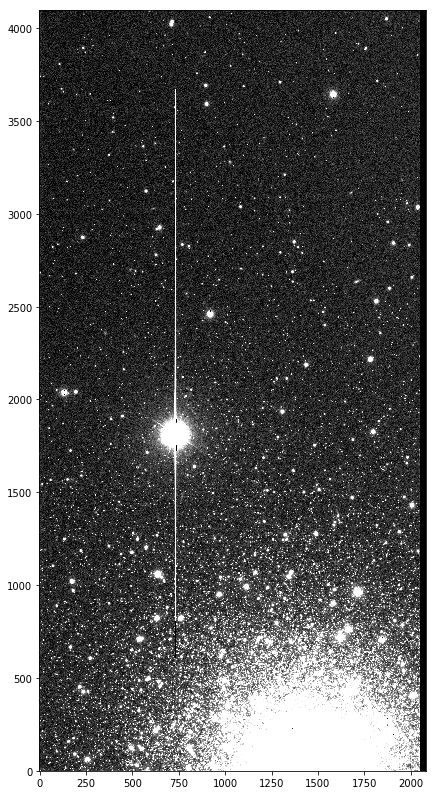

In [20]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.show()

次に、画面の中に印を書き込んでみます。

In [21]:
xcoo = [500, 1500]
ycoo = [1200, 3000]

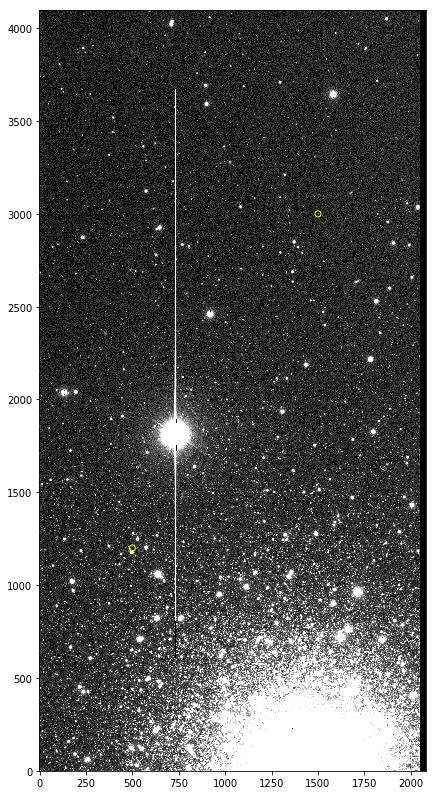

In [22]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.scatter(xcoo, ycoo, edgecolors='yellow', facecolors='none')
plt.show()

上の要領で星の(x,y)座標を与えてやると星にマークをつけつことができますね。  

#### 部分表示 
次に、画像の一部分だけを抜き出してみましょう。

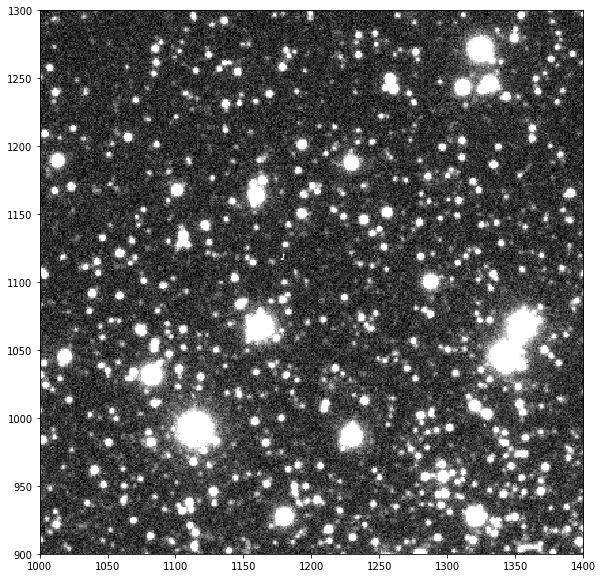

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.xlim(1000, 1400)  
plt.ylim(900, 1300)
plt.show()
# plt.savefig('myfig.png')   上のplt.show()をコメントアウトし、この行を実行するとファイルに保存できる。

### オーバースキャン部分のY依存を表示  



In [24]:
im1 = fits.getdata('./M15/set1/SUPA00322525.fits')

オーバースキャン部分にて、各rowのメジアンを計算します。  

In [25]:
medo = np.median(im1[:, 2049:], axis=1)

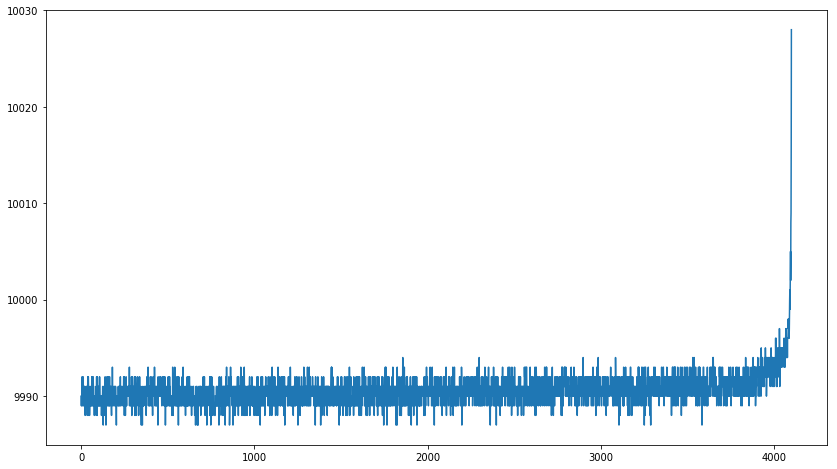

In [26]:
plt.figure(figsize=(14, 8))
plt.plot(medo)
plt.show()

### おまけ 

** グラフを並べる --- subplot()**


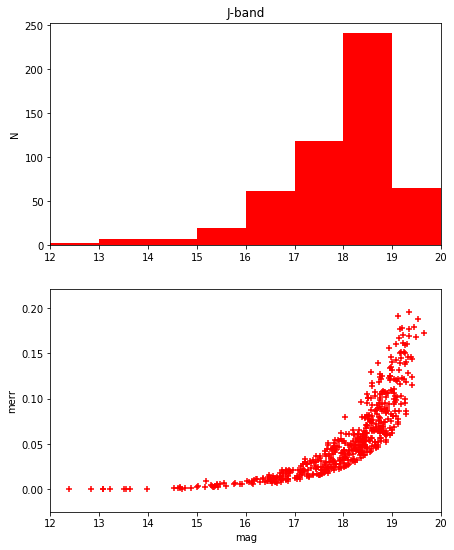

In [27]:
plt.figure(figsize=(7, 9))

plt.subplot(211)
plt.hist(mag, bins=8, range=(12,20), color='red')
plt.xlim(12, 20)
plt.title('J-band')
plt.ylabel('N')

plt.subplot(212)  
plt.scatter(mag, merr, marker='+', color='red')
plt.xlim(12, 20)
plt.xlabel('mag')
plt.ylabel('merr')
plt.show()

上のグラフで、「subpot(211)とsubplot(212)」を「subpot(121)とsubplot(122)」に変えると横並びになります。

名前の紛らわしい関数があります。subplot()とsubplots()です。  
plt.subplots()を使うと下のように軸の共有ができます。

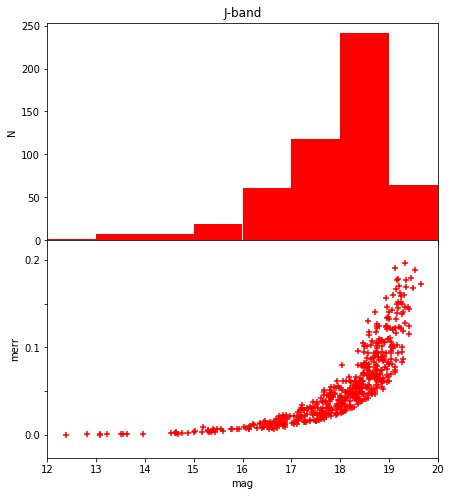

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 8))

ax1.hist(mag, bins=8, range=(12,20), color='red')

ax2.scatter(mag, merr, marker='+', color='red')

f.subplots_adjust(hspace=0)

ax1.set_title('J-band')
ax1.set_ylabel('N')
ax1.set_xlim(12, 20)
ax2.set_xlabel('mag')
ax2.set_ylabel('merr')
ax2.set_yticklabels(['',0.0,'',0.1,'',0.2,''])

plt.show()

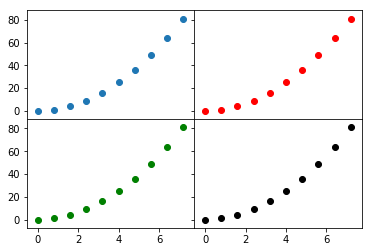

In [29]:
# 2次関数の離散データを作成
x = np.arange(10)
y = x * x

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax1.scatter(x, y)
ax2.scatter(x, y, color='red')
ax3.scatter(x, y, color='green')
ax4.scatter(x, y, color='black')
f.subplots_adjust(hspace=0, wspace=0)
ax1.set_xticklabels(['', 0,2,4,6,8,10])
ax1.set_yticklabels(['',0,20,40,60,80,100])

plt.show()

** FITS画像の表示の補足 ** 

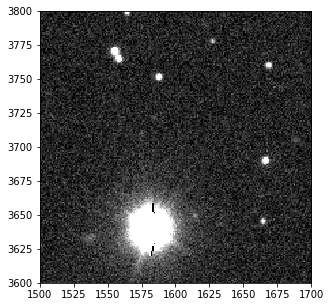

In [30]:
plt.figure(figsize=(5, 5))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.xlim(1500, 1700)
plt.ylim(3600, 3800)
plt.show()

カラーマップは色々用意されています。 
http://matplotlib.org/examples/color/colormaps_reference.html   
jetとかrainbowあたり、天文用によく使われるかも。

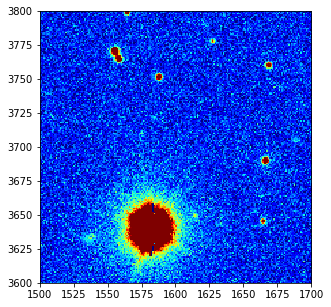

In [31]:
plt.figure(figsize=(5, 5))
plt.imshow(img, plt.cm.jet, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.xlim(1500, 1700)
plt.ylim(3600, 3800)
plt.show()